In [18]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time
import gym_CliffWorld

### Environment

In [19]:
env = gym.make('cliff_world-v0')

### Agent

#### Markovian decision process interpretation

In [20]:
num_action, num_state = env.action_space, env.state_space

#### Constant Exploration Rate

In [21]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.02, 
    'exploration_rate_decay': {
        'er': 0.1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'trace_decay': 0.9,
    'num_action': env.action_space,
    'num_state': env.state_space,
}
q_learning_agent = myagents.QLearningAgent(agent_init)

#### Exploration Rate Decay

In [22]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.02, 
    'exploration_rate_decay': {
        'er': 0.1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.005,
        'constant_er': True
    },
    'trace_decay': 0.9,
    'num_action': env.action_space,
    'num_state': env.state_space,
}
expected_sarsa_agent = myagents.ExpectedSarsaAgent(agent_init) 

### Training

In [23]:

n_episode = 50000
t_max_per_episode = 500
verbose = False
graphical = False
agents = {
    'q_learning_agent': q_learning_agent,
    'expected_sarsa_agent': expected_sarsa_agent,
    
}
rewards_per_episode_per_agent = {
    'q_learning_agent': list(),
    'expected_sarsa_agent': list()
    
}
rewards_per_episode_per_agent_array = {
    'q_learning_agent': np.array([]),
    'expected_sarsa_agent': np.array([])
    
}
rewards_per_episode_array = np.array([])

In [24]:
for agent_name, agent in agents.items():

    for i_episode in tqdm(range(n_episode)):

        rewards = 0
        state = env.reset()
        if type(state) is tuple: 
            state = np.ravel_multi_index(state, state_dim)
        next_action = agent.episode_init(state)

        for t in range(t_max_per_episode):

            if graphical:
                clear_output(wait=True)
                env.render()


            state, reward, done, info = env.step(next_action)
            
            if type(state) is tuple: 
                state = np.ravel_multi_index(state, state_dim)
                
            next_action = agent.update(state, reward, done)

            rewards += reward
            if done:
                break

        rewards_per_episode_per_agent[agent_name].append(rewards)
        agent.epsilon.next()

    agent.epsilon.reset_episode_count()
    
env.close()

100%|██████████| 50000/50000 [00:58<00:00, 860.37it/s]


### Analysis

In [25]:
for array_name, array in rewards_per_episode_per_agent_array.items():
    rewards_per_episode_per_agent_array[array_name] = np.concatenate(
        [rewards_per_episode_per_agent_array[array_name], 
         np.array(rewards_per_episode_per_agent[array_name])]
    )


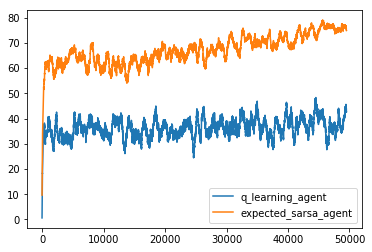

In [26]:
for agent_name, rewards_per_episode_array in rewards_per_episode_per_agent_array.items():
    
    rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode_array, n=500)
    plt.plot(range(len(rewards_per_episode_rolling_mean)), 
             rewards_per_episode_rolling_mean,
            label=agent_name)

plt.legend()

#### HEATMAP

In [27]:
import seaborn as sb

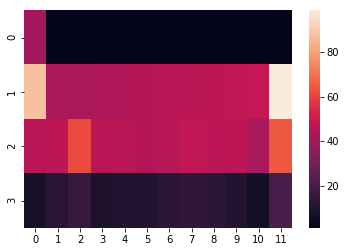

In [28]:
sb.heatmap(agents["q_learning_agent"].q.reshape(4, 4, 12).mean(axis=0))

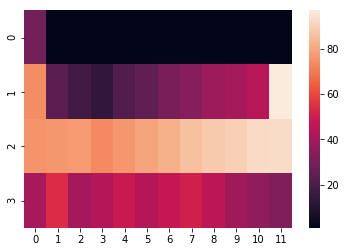

In [29]:
sb.heatmap(agents["expected_sarsa_agent"].q.reshape(4, 4, 12).mean(axis=0))

### TESTING

In [30]:
n_episode_test = 4
agent_to_test = agents["expected_sarsa_agent"]
graphical = True

In [31]:
for i_episode in range(n_episode_test):
    
    rewards = 0
    state = env.reset()
    next_action = agent_to_test.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            time.sleep(0.2)
            
        
        state, reward, done, info = env.step(next_action)
        next_action = agent_to_test.e_greedy(state, always_greedy=True)
        if done:
            break

agent_to_test.epsilon.reset_episode_count()
env.close()

SXXXXXXXXXXG
___________T
____________
____________
